# Creating the initial conditions

In [1]:
from roms_tools import Grid, VerticalCoordinate

We start by creating a grid and the vertical coordinate system. Note that it is important to use the same grid and vertical coordinate system throughout all the steps (i.e., creating tidal forcing, atmospheric forcing, initial conditions, etc.) to set up a consistent ROMS simulation. Here, we use the following grid and vertical coordinate system.

In [5]:
grid = Grid(
    nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-21, center_lat=61, rot=20
)

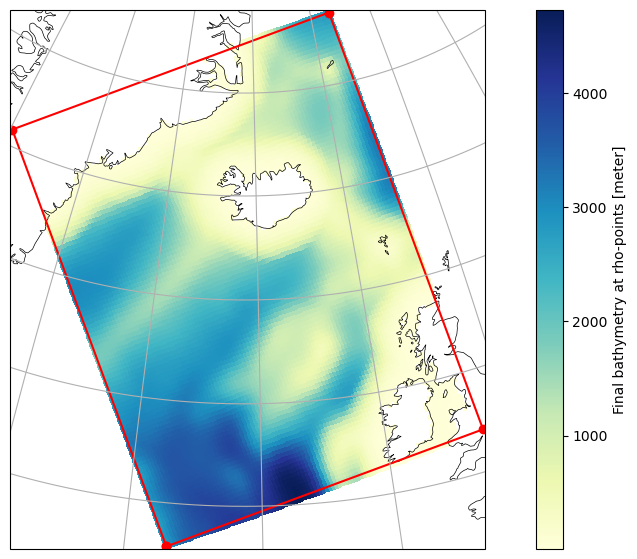

In [6]:
grid.plot(bathymetry=True)

In [8]:
vertical_coordinate = VerticalCoordinate(
    grid=grid,
    N=100,  # number of vertical levels
    theta_s=5.0,  # surface control parameter
    theta_b=2.0,  # bottom control parameter
    hc=300.0,  # critical depth
)

## Initial conditions from GLORYS
In this section, we use GLORYS data to create our initial conditions. Say we want to get initial conditions for January 2, 2012.

In [9]:
from datetime import datetime

ini_time = datetime(2012, 1, 2)

Our GLORYS data for that day sits at the following path.

In [10]:
filename = "/glade/derecho/scratch/bachman/GLORYS/NA/2012/mercatorglorys12v1_gl12_mean_20120102.nc"

Note that it would also be okay to provide a filename that contains data for more than just the day of interest. `ROMS-Tools` will pick out the correct day (and complain if the day of interest is not in the provided filename.) Or we can even use wildcards, such as `filename='/glade/derecho/scratch/bachman/GLORYS/NA/2012/*.nc'`.

We can now create the `InitialConditions` object.

In [11]:
from roms_tools import InitialConditions

In [12]:
%%time
ic = InitialConditions(
    grid=grid,  # grid object
    vertical_coordinate=vertical_coordinate,  # vertical coordinate object
    ini_time=ini_time,  # initialization date
    source="glorys",  # source of the initial condition data
    filename=filename,  # path to the source data file
)

CPU times: user 9.47 s, sys: 280 ms, total: 9.75 s
Wall time: 13.1 s


The initial conditions variables are held in an xarray Dataset that is accessible via the `.ds` property.

In [13]:
ic.ds

<xarray.Dataset> Size: 46MB
Dimensions:              (time: 1, eta_v: 101, xi_rho: 102, eta_rho: 102,
                          s_rho: 100, xi_u: 101, s_w: 101)
Coordinates: (12/14)
  * time                 (time) datetime64[ns] 8B 2012-01-02T12:00:00
    lat_rho              (eta_v, xi_rho) float64 82kB 48.04 48.1 ... 73.51 73.53
    lon_rho              (eta_v, xi_rho) float64 82kB 332.9 333.1 ... 353.2
    layer_depth_rho      (eta_rho, xi_rho, s_rho) float32 4MB 2.864e+03 ... 1...
    lat_u                (eta_rho, xi_u) float64 82kB 47.87 47.94 ... 73.5 73.52
    lon_u                (eta_rho, xi_u) float64 82kB 333.2 333.4 ... 352.9
    ...                   ...
    interface_depth_rho  (eta_rho, xi_rho, s_w) float32 4MB 2.886e+03 ... -0.0
    layer_depth_u        (eta_rho, xi_u, s_rho) float32 4MB 2.864e+03 ... 1.378
    layer_depth_v        (eta_v, xi_rho, s_rho) float32 4MB 2.864e+03 ... 1.378
    interface_depth_u    (eta_rho, xi_u, s_w) float32 4MB 2.886e+03 ... -0.0
    interface_depth_v    (eta_v, xi_rho, s_w) float32 4MB 2.886e+03 ... -0.0
    ocean_time           (time) float32 4B 3.788e+08
Dimensions without coordinates: eta_v, xi_rho, eta_rho, s_rho, xi_u, s_w
Data variables: (12/14)
    temp                 (time, eta_rho, xi_rho, s_rho) float32 4MB dask.array<chunksize=(1, 102, 102, 100), meta=np.ndarray>
    salt                 (time, eta_rho, xi_rho, s_rho) float32 4MB dask.array<chunksize=(1, 102, 102, 100), meta=np.ndarray>
    zeta                 (time, eta_rho, xi_rho) float32 42kB -0.4969 ... -0....
    u                    (time, eta_rho, xi_u, s_rho) float32 4MB dask.array<chunksize=(1, 102, 101, 100), meta=np.ndarray>
    v                    (time, eta_v, xi_rho, s_rho) float32 4MB dask.array<chunksize=(1, 101, 102, 100), meta=np.ndarray>
    w                    (time, eta_rho, xi_rho, s_w) float32 4MB 0.0 ... 0.0
    ...                   ...
    theta_s              float32 4B 5.0
    theta_b              float32 4B 2.0
    Tcline               float32 4B 300.0
    hc                   float32 4B 300.0
    sc_r                 (s_rho) float32 400B -0.995 -0.985 ... -0.015 -0.005
    Cs_r                 (s_rho) float32 400B -0.992 -0.9753 ... -9.874e-06
Attributes:
    Title:    ROMS initial file produced by roms-tools

You can see that all initial conditions variables are Dask arrays, so these fields have not been actually computed yet. An exception is the variable `zeta`, which has been computed to check for NaNs in the interpolated fields, and the variable `w`, which is set to zero. Full computation will not be triggered until the `.plot` or `.save` methods are called.

## Plotting

Let's make some plots! As an example, let's have a look at the temperature field `temp`. It is three-dimensional with horizontal dimensions `eta_rho` and `xi_rho`, and vertical dimension `s_rho`.

In [14]:
ic.ds.temp

<xarray.DataArray 'temp' (time: 1, eta_rho: 102, xi_rho: 102, s_rho: 100)> Size: 4MB
dask.array<astype, shape=(1, 102, 102, 100), dtype=float32, chunksize=(1, 102, 102, 100), chunktype=numpy.ndarray>
Coordinates:
  * time             (time) datetime64[ns] 8B 2012-01-02T12:00:00
    layer_depth_rho  (eta_rho, xi_rho, s_rho) float32 4MB 2.864e+03 ... 1.378
    ocean_time       (time) float32 4B 3.788e+08
Dimensions without coordinates: eta_rho, xi_rho, s_rho
Attributes:
    long_name:  Potential temperature
    units:      Celsius

We first want to plot different layers of the temperature field, i.e., slice along the vertical dimension `s`.

CPU times: user 58.9 s, sys: 868 ms, total: 59.8 s
Wall time: 1min 4s


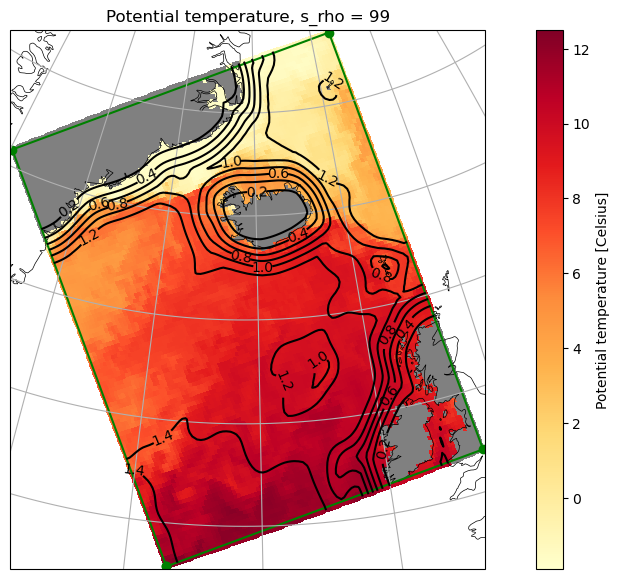

In [15]:
%time ic.plot("temp", s=-1, depth_contours=True)  # plot uppermost layer

Note that this took some time because the computation of the three-dimensional temperature field was triggered before plotting. Indeed, the temperature values are now fully computed (and don't need to be re-computed when calling the `.plot` or `.save` methods).

In [16]:
ic.ds.temp

<xarray.DataArray 'temp' (time: 1, eta_rho: 102, xi_rho: 102, s_rho: 100)> Size: 4MB
array([[[[ 3.2133336 ,  3.2133336 ,  3.2133336 , ..., 11.861317  ,
          11.861317  , 11.861317  ],
         [ 2.8887794 ,  2.9167864 ,  2.9459798 , ..., 11.975734  ,
          11.975734  , 11.975734  ],
         [ 2.8351593 ,  2.8394558 ,  2.8439693 , ..., 12.094538  ,
          12.094538  , 12.094538  ],
         ...,
         [ 8.045102  ,  8.045077  ,  8.045053  , ...,  8.0427065 ,
           8.042685  ,  8.042663  ],
         [ 8.14938   ,  8.149358  ,  8.149337  , ...,  8.147175  ,
           8.147154  ,  8.147133  ],
         [ 8.375315  ,  8.375298  ,  8.37528   , ...,  8.373467  ,
           8.373449  ,  8.373431  ]],

        [[ 2.927417  ,  2.939567  ,  2.9522321 , ..., 12.0453415 ,
          12.0453415 , 12.045038  ],
         [ 2.8645372 ,  2.884021  ,  2.9043305 , ..., 12.128715  ,
          12.128715  , 12.128336  ],
         [ 2.9462984 ,  2.9462984 ,  2.9462984 , ..., 12.21467   ,
          12.21467   , 12.21467   ],
...
         [-0.9963152 , -0.9950389 , -0.9937087 , ..., -0.5203094 ,
          -0.5207716 , -0.5212487 ],
         [-1.0010488 , -0.9992769 , -0.9974301 , ..., -0.5480129 ,
          -0.5480129 , -0.54781103],
         [-1.0041753 , -1.0013474 , -0.9983999 , ..., -0.6815782 ,
          -0.68099326, -0.6808458 ]],

        [[-1.2862183 , -1.2862204 , -1.2862226 , ..., -1.2875129 ,
          -1.2875314 , -1.2875499 ],
         [-1.2359356 , -1.2359389 , -1.2359424 , ..., -1.2373762 ,
          -1.2373962 , -1.2374161 ],
         [-1.1889087 , -1.1889133 , -1.188918  , ..., -1.1904925 ,
          -1.190514  , -1.1905353 ],
         ...,
         [-1.006307  , -1.0014566 , -0.99640125, ..., -0.6358748 ,
          -0.6358841 , -0.6358841 ],
         [-1.0111945 , -1.0061735 , -1.0009403 , ..., -0.6390127 ,
          -0.6390127 , -0.6392241 ],
         [-1.0104384 , -1.0060076 , -1.0013894 , ..., -0.64388454,
          -0.6442147 , -0.6443343 ]]]], dtype=float32)
Coordinates:
  * time             (time) datetime64[ns] 8B 2012-01-02T12:00:00
    layer_depth_rho  (eta_rho, xi_rho, s_rho) float32 4MB 2.864e+03 ... 1.378
    ocean_time       (time) float32 4B 3.788e+08
Dimensions without coordinates: eta_rho, xi_rho, s_rho
Attributes:
    long_name:  Potential temperature
    units:      Celsius

Now plotting of the temperature field should be a lot faster.

CPU times: user 174 ms, sys: 0 ns, total: 174 ms
Wall time: 175 ms


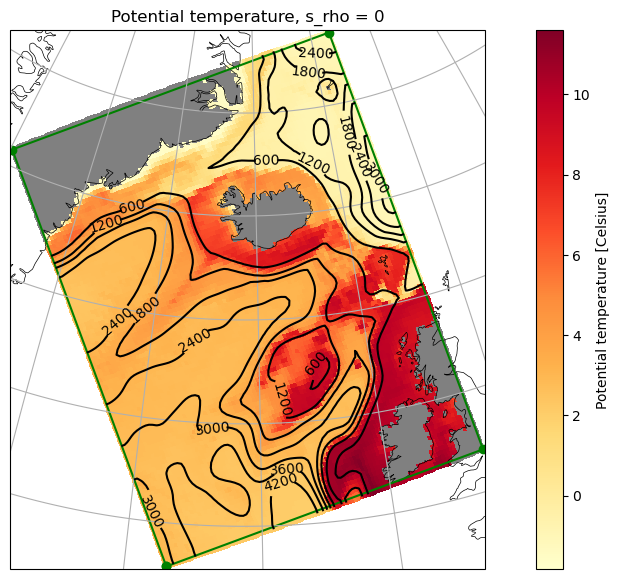

In [17]:
%time ic.plot("temp", s=0, depth_contours=True)  # plot bottom layer

Next, we slice our domain along one of the horizontal dimensions and look at temperature along these sections.

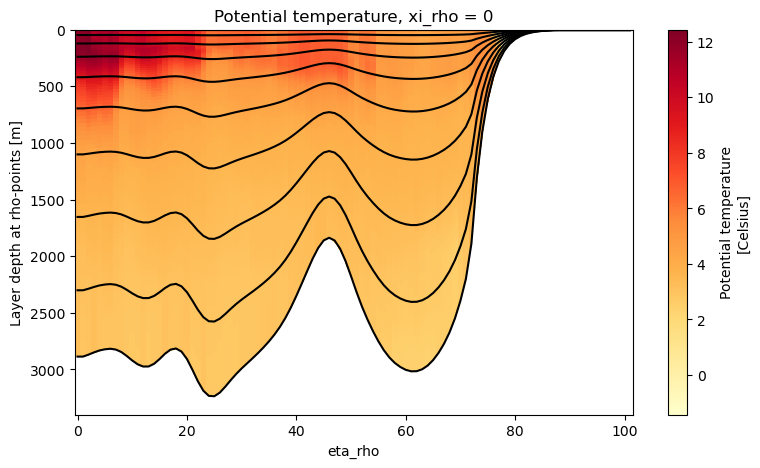

In [18]:
ic.plot("temp", xi=0, layer_contours=True)

Note that even though we have a total of 100 layers, `layer_contours = True` will create a plot with a maximum of 10 contours to ensure plot clarity.

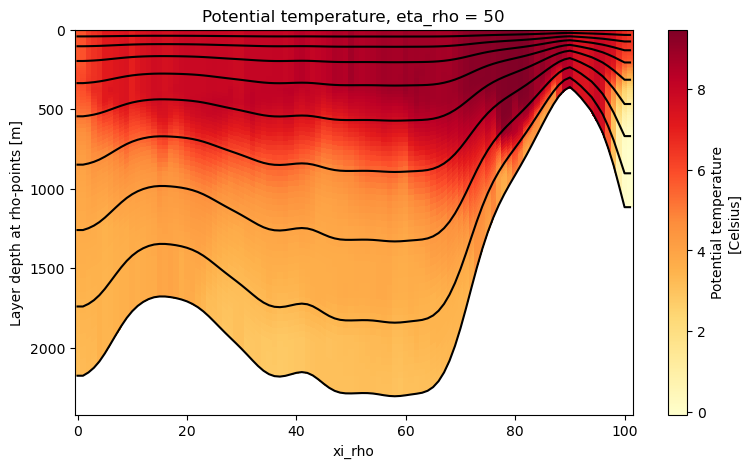

In [19]:
ic.plot("temp", eta=50, layer_contours=True)

We can also plot a depth profile at at certain spatial location.

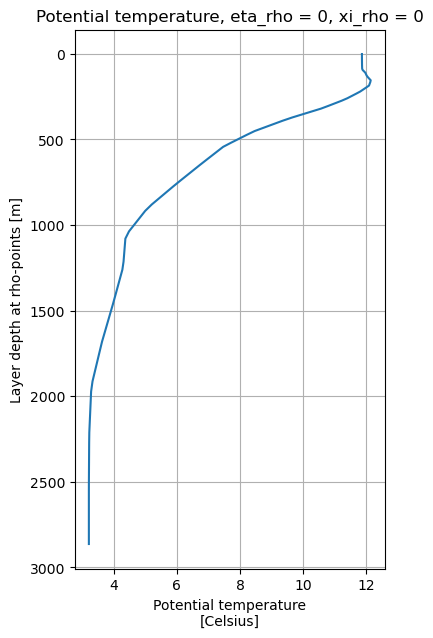

In [20]:
ic.plot("temp", eta=0, xi=0)

Finally, we can look at a transect in a certain layer and at a fixed `eta_rho` (similarly `xi_rho`).

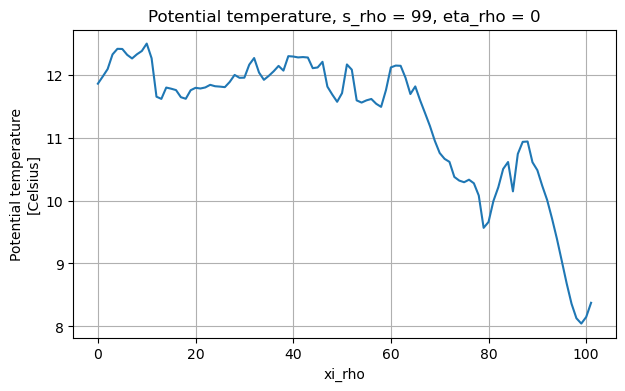

In [21]:
ic.plot("temp", eta=0, s=-1)

## Saving as NetCDF file

We can now save the dataset as a NetCDF file.

In [22]:
path = "/glade/derecho/scratch/noraloose/initial_conditions/ic_Iceland.nc"

In [23]:
from dask.diagnostics import ProgressBar

In [24]:
with ProgressBar():
    %time ic.save(filepath=path)

[########################################] | 100% Completed | 143.62 s
CPU times: user 1min 43s, sys: 1.96 s, total: 1min 45s
Wall time: 2min 24s
